In [71]:
import pandas as pd

##  Acquire

In [72]:
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [73]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


## Transform

In [74]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

Convert Date to DateTimeObject

In [75]:
df.date = pd.DatetimeIndex(df.date)

In [76]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

Create the priceDiff Column

In [77]:
df['priceDiff'] = df.priceMax - df.priceMin

Subset for Bangalore and Delhi

In [78]:
dfTest = df[(df.city == 'BANGALORE') | (df.city == 'DELHI')].copy()

In [79]:
dfTest.shape

(326, 11)

Is the priceDiff for Bangalore and Delhi similiar?

## Explore

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

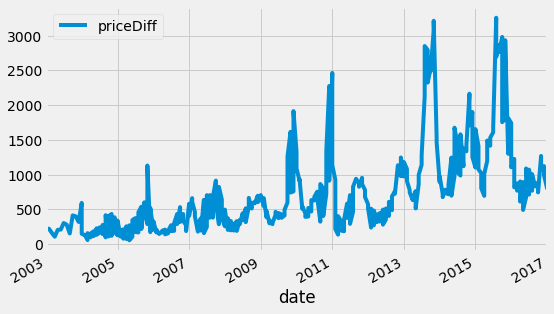

In [81]:
dfTest.plot(y='priceDiff', x='date')

How to split Bangalore and Delhi - 
- PivotTable 
- Color (Delhi and Bangalore)
- Two separate plots on the same graph
- Two separate plots on two separate graph

In [82]:
dfTestPivot = pd.pivot_table(data=dfTest, index = "date", columns="city", values='priceDiff')

In [83]:
dfTestPivot.tail()

city,BANGALORE,DELHI
date,,
2016-09-01,853.0,831.0
2016-10-01,887.0,745.0
2016-11-01,1269.0,1068.0
2016-12-01,1123.0,989.0
2017-01-01,904.0,804.0


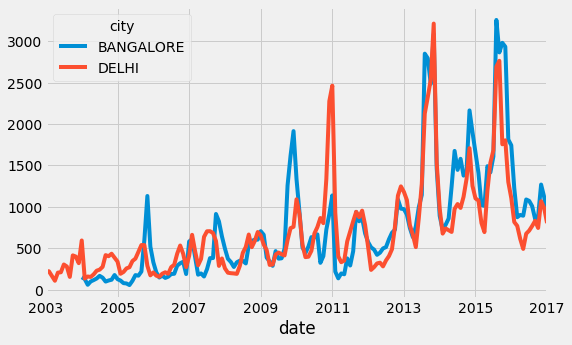

In [84]:
dfTestPivot.plot()

In [133]:
dfTest['cityCode'] = 0

In [131]:
dfTest.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,cityCode
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,150,123
848,BANGALORE,January,2005,335679,470,597,522,KT,BANGALORE,2005-01-01,127,123
849,BANGALORE,January,2006,412185,286,617,537,KT,BANGALORE,2006-01-01,331,123
850,BANGALORE,January,2007,268268,586,1167,942,KT,BANGALORE,2007-01-01,581,123
851,BANGALORE,January,2008,393806,174,671,472,KT,BANGALORE,2008-01-01,497,123


In [134]:
dfTest.loc[df.city=='BANGALORE', 'cityCode'] = 1

In [128]:
dfTest.cityCode.describe()

count    326.000000
mean     186.245399
std       61.052370
min      123.000000
25%      123.000000
50%      245.000000
75%      245.000000
max      245.000000
Name: cityCode, dtype: float64

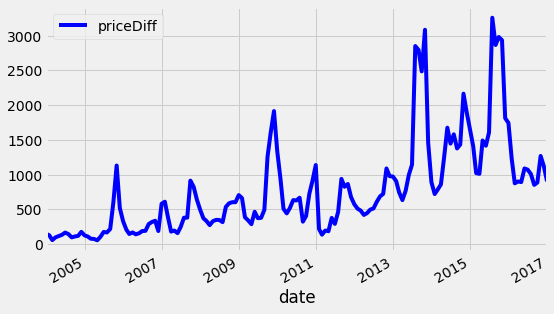

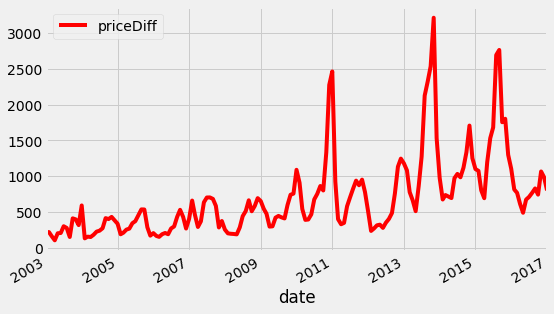

In [138]:
dfTest[dfTest.cityCode == 1].plot(x='date', y='priceDiff', c='b')
dfTest[dfTest.cityCode == 0].plot(x='date', y='priceDiff', c='r')

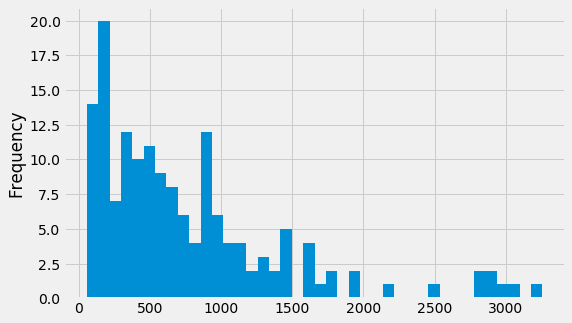

In [147]:
dfTest[dfTest.city == 'BANGALORE'].priceDiff.plot(kind='hist', bins=40)

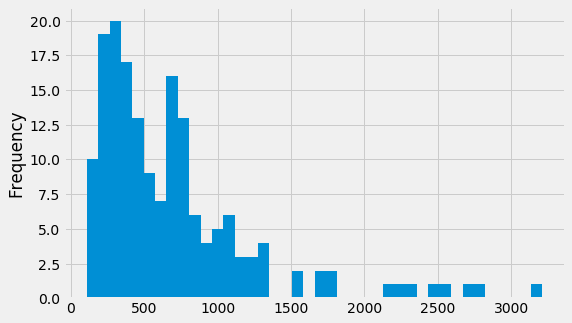

In [146]:
dfTest[dfTest.city == 'DELHI'].priceDiff.plot(kind='hist', bins=40)

# Statistically 

In [148]:
dfTestBng = dfTest[dfTest.city == 'BANGALORE']
dfTestDel = dfTest[dfTest.city == 'DELHI']

In [151]:
dfTestBng.priceDiff.mean(), dfTestDel.priceDiff.mean()

(772.1146496815287, 693.1597633136095)

In [152]:
dfTestBng.priceDiff.describe(), dfTestDel.priceDiff.describe()

(count     157.000000
 mean      772.114650
 std       683.336132
 min        56.000000
 25%       290.000000
 50%       602.000000
 75%      1008.000000
 max      3256.000000
 Name: priceDiff, dtype: float64, count     169.000000
 mean      693.159763
 std       556.647173
 min       108.000000
 25%       303.000000
 50%       538.000000
 75%       831.000000
 max      3212.000000
 Name: priceDiff, dtype: float64)

In [156]:
import numpy as np

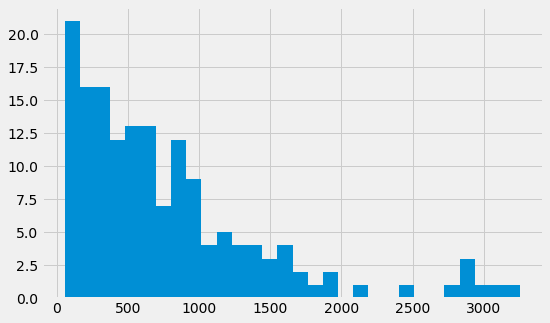

In [162]:
plt.hist(dfTestBng.priceDiff, bins=30)
plt.show()

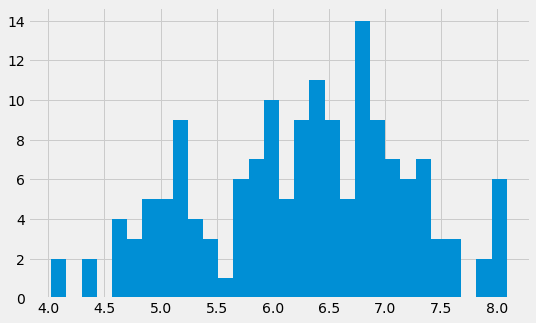

In [160]:
plt.hist(np.log(dfTestBng.priceDiff), bins=30)
plt.show()

In [163]:
import seaborn as sns

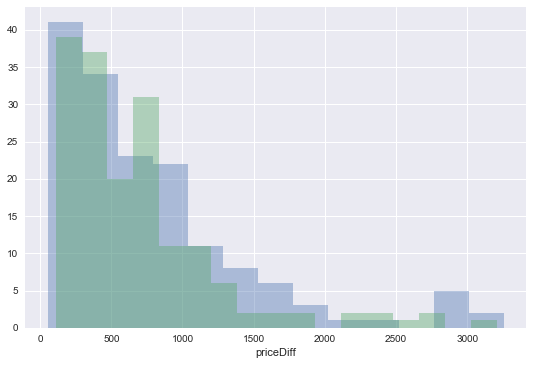

In [173]:
sns.distplot(dfTestBng.priceDiff, kde=False)
sns.distplot(dfTestDel.priceDiff, kde=False)

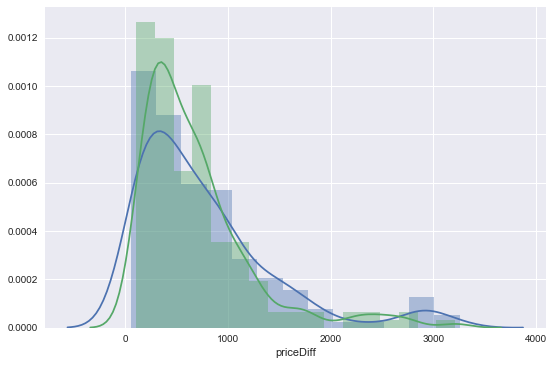

In [174]:
sns.distplot(dfTestBng.priceDiff)
sns.distplot(dfTestDel.priceDiff)

## Predict the onion price of Bangalore

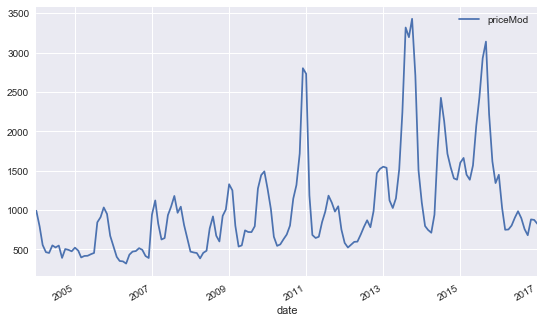

In [179]:
dfTestBng.plot(y='priceMod', x='date')


Random Walk


In [204]:
dfBngPriceMod = dfTestBng[['date', 'priceMod']].copy()

In [205]:
dfBngPriceMod.index = dfBngPriceMod.date

In [206]:
dfBngPriceMod.sort_values(by = 'date', inplace=True)

In [207]:
dfBngPriceMod['priceModShift'] = dfBngPriceMod.priceMod.shift()

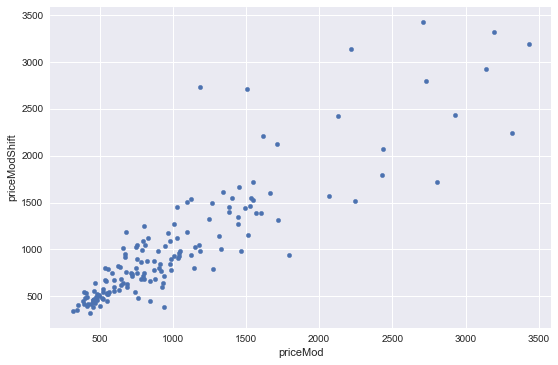

In [213]:
dfBngPriceMod.plot(kind='scatter', x='priceMod', y='priceModShift')

## Transform

In [260]:
from fbprophet import Prophet

In [261]:
dfBngPriceMod.head()

,date,priceMod,priceModShift,priceModLog
date,,,,
2004-01-01,2004-01-01,991,NaN,6.898715
2004-02-01,2004-02-01,793,991.0,6.675823
2004-03-01,2004-03-01,556,793.0,6.320768
2004-04-01,2004-04-01,465,556.0,6.142037
2004-05-01,2004-05-01,455,465.0,6.120297


In [262]:
dfBngPriceMod['priceModLog'] = np.log(dfBngPriceMod.priceMod)

In [263]:
dfBngPriceMod.head()

,date,priceMod,priceModShift,priceModLog
date,,,,
2004-01-01,2004-01-01,991,NaN,6.898715
2004-02-01,2004-02-01,793,991.0,6.675823
2004-03-01,2004-03-01,556,793.0,6.320768
2004-04-01,2004-04-01,465,556.0,6.142037
2004-05-01,2004-05-01,455,465.0,6.120297


In [264]:
dfBngPriceLog = dfBngPriceMod.drop(labels=['priceModShift', 'priceMod'], axis=1)

In [265]:
dfBngPriceLog.head()

,date,priceModLog
date,,
2004-01-01,2004-01-01,6.898715
2004-02-01,2004-02-01,6.675823
2004-03-01,2004-03-01,6.320768
2004-04-01,2004-04-01,6.142037
2004-05-01,2004-05-01,6.120297


In [266]:
dfBngPriceLog.columns = ['ds', 'y']

In [267]:
dfBngPriceLog.head()

,ds,y
date,,
2004-01-01,2004-01-01,6.898715
2004-02-01,2004-02-01,6.675823
2004-03-01,2004-03-01,6.320768
2004-04-01,2004-04-01,6.142037
2004-05-01,2004-05-01,6.120297


In [268]:
m = Prophet()

In [269]:
m.fit(dfBngPriceLog)

In [270]:
future = m.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
177,2018-09-30
178,2018-10-31
179,2018-11-30
180,2018-12-31
181,2019-01-31


In [271]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
177,2018-09-30,7.216689,6.777162,7.638491
178,2018-10-31,6.949697,6.532544,7.387047
179,2018-11-30,6.951674,6.502240,7.426115
180,2018-12-31,7.175524,6.703686,7.640490
181,2019-01-31,6.811306,6.355866,7.307589


In [272]:
#dfBngPriceLog.reset_index(inplace=True)

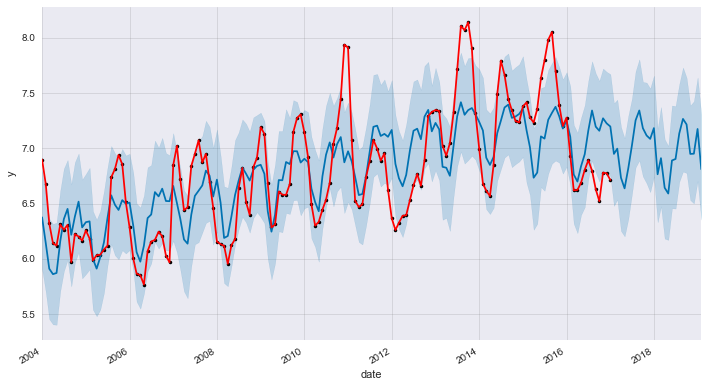

In [273]:
m.plot(forecast)
dfBngPriceLog.y.plot(kind='line', c='r')

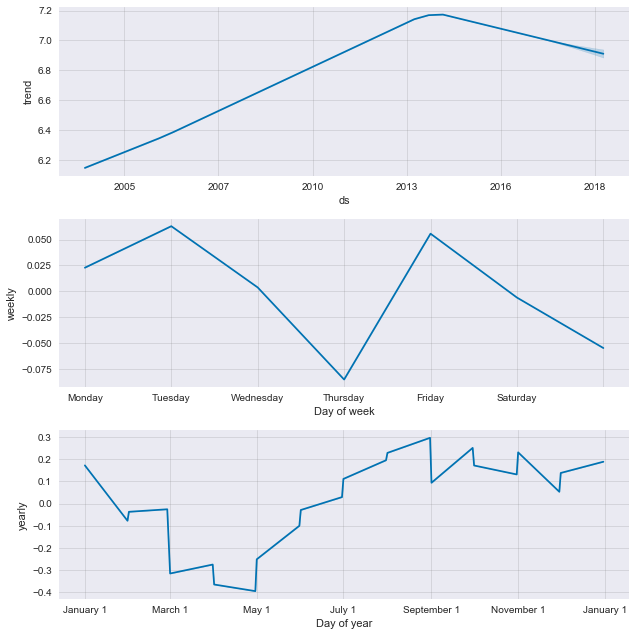

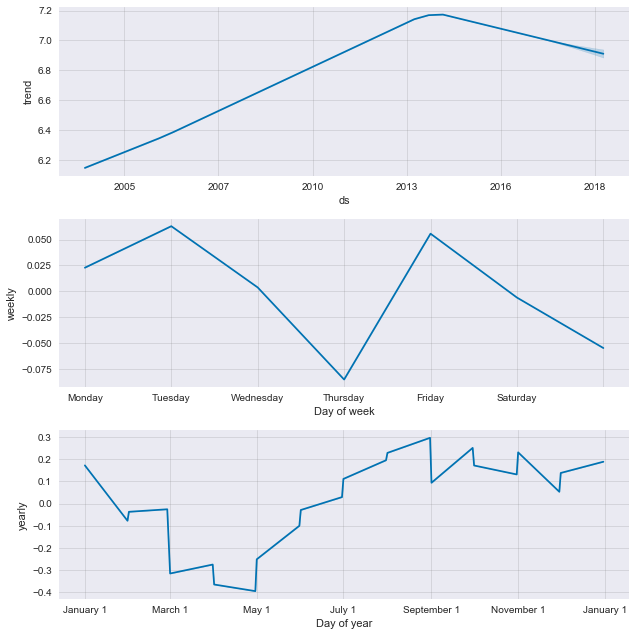

In [274]:
m.plot_components(forecast)